In [1]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup
from datetime import datetime
from selenium import webdriver
from datetime import datetime
from selenium.webdriver import Edge, Chrome
import time
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import nltk
from datetime import timedelta


In [2]:
def title_proofing(title,keyword):
    words = nltk.word_tokenize(title)
    tagged = nltk.pos_tag(words)
    grammar = 'NAV: {<NN.?><IN>*<POS>*<CC>*<JJ.?>*<NN.?>*<RB.?>*<VB.?>*}'
    gram_parser = nltk.RegexpParser(grammar)
    chunked = gram_parser.parse(tagged)
    for subtree in chunked.subtrees(lambda chunked: chunked.height() ==2):
        if subtree.label() == 'NAV' and keyword in str(subtree):
            return True
        else:
            return False

    return False

In [5]:
driver = Edge('c:/users/em17/edgedriver_win64/msedgedriver.exe')

articles = {}
articles['title'] = []
articles['link'] = []
articles['week'] = []

subject = 'Trump'

date1 = re.compile('[0-9]{4}/[0-9]{2}/[0-9]{2}')
date2 = re.compile('[0-9]{2}-[0-9]{2}-[0-9]{2}')
date3 = re.compile('[0-9]{4}-[0-9]{2}-[0-9]{2}')


nb_results = 3000
nb_pages = (nb_results//10)+1

for i in range(1,nb_pages+1):
    page = f'https://edition.cnn.com/search?q={subject}*&from={(i-1)*10}&size=10&page={i}&sort=newest&types=all&section='  
    print(page)
    driver.get(page)
    time.sleep(1)
    arts = driver.find_elements_by_class_name("container__headline-text")
    for article in arts:
        title = article.text
        link = article.get_attribute('data-zjs-href')
        if title_proofing(title,subject) == False or 'video' in link:
            continue
        if re.search(date1,link) is not None:
            date = re.search(date1,link).group()
            date = datetime.strptime(date, '%Y/%m/%d')
        elif re.search(date2,link) is not None:
            date = re.search(date2,link).group()
            try:
                date = datetime.strptime(date, '%m-%d-%y')
            except:
                date = datetime.strptime(date, '%y-%m-%d')
        elif re.search(date3,link) is not None:
            date = re.search(date3,link).group()
            date = datetime.strptime(date, '%Y-%m-%d')
        else:
            continue        
        
        delta = int(datetime.strftime(date,'%w'))-1
        week = date - timedelta(days = delta)

        articles['title'].append(title)
        articles['link'].append(link)
        articles['week'].append(datetime.strftime(week,'%y/%m/%d'))


driver.quit()


df_articles = pd.DataFrame(articles)

df_articles

https://edition.cnn.com/search?q=Trump*&from=0&size=10&page=1&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=10&size=10&page=2&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=20&size=10&page=3&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=30&size=10&page=4&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=40&size=10&page=5&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=50&size=10&page=6&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=60&size=10&page=7&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=70&size=10&page=8&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=80&size=10&page=9&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=90&size=10&page=10&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=100&size=10&pag

https://edition.cnn.com/search?q=Trump*&from=860&size=10&page=87&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=870&size=10&page=88&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=880&size=10&page=89&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=890&size=10&page=90&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=900&size=10&page=91&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=910&size=10&page=92&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=920&size=10&page=93&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=930&size=10&page=94&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=940&size=10&page=95&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=950&size=10&page=96&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&

https://edition.cnn.com/search?q=Trump*&from=1700&size=10&page=171&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=1710&size=10&page=172&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=1720&size=10&page=173&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=1730&size=10&page=174&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=1740&size=10&page=175&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=1750&size=10&page=176&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=1760&size=10&page=177&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=1770&size=10&page=178&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=1780&size=10&page=179&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=1790&size=10&page=180&sort=newest&types=all&section=
https://edition.cnn.

https://edition.cnn.com/search?q=Trump*&from=2540&size=10&page=255&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=2550&size=10&page=256&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=2560&size=10&page=257&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=2570&size=10&page=258&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=2580&size=10&page=259&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=2590&size=10&page=260&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=2600&size=10&page=261&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=2610&size=10&page=262&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=2620&size=10&page=263&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=2630&size=10&page=264&sort=newest&types=all&section=
https://edition.cnn.

,title,link,week
0,Trump in 2020 praised Tim Walz’s handling of G...,https://www.cnn.com/2024/08/07/politics/trump-...,24/08/05
1,How the Trump campaign plans to try to define ...,https://www.cnn.com/2024/08/06/politics/republ...,24/08/05
2,Trump and Vance rally in battleground Georgia ...,https://www.cnn.com/2024/08/03/politics/trump-...,24/07/29
3,Trump says he’ll debate Harris on Fox News or ...,https://www.cnn.com/2024/08/03/politics/kamala...,24/07/29
4,Trump’s political operation says it raised nea...,https://www.cnn.com/2024/08/01/politics/donald...,24/07/29
...,...,...,...
240,New Trump super PAC ad hammers Biden on immigr...,https://www.cnn.com/2024/04/17/politics/trump-...,24/04/15
241,"Trump targets Alvin Bragg, the prosecutor in h...",https://www.cnn.com/2024/04/16/politics/trump-...,24/04/15
242,Did Donald Trump fall asleep in court? Why the...,https://www.cnn.com/2024/04/16/media/donald-tr...,24/04/15
243,Trump has an unusual request on trial Day 1,https://www.cnn.com/2024/04/15/politics/trump-...,24/04/15


In [6]:
print(len(list(df_articles.title)))
list(df_articles.title)

245


['Trump in 2020 praised Tim Walz’s handling of George Floyd protests',
 'How the Trump campaign plans to try to define Tim Walz',
 'Trump and Vance rally in battleground Georgia looking to put recent struggles behind them',
 'Trump says he’ll debate Harris on Fox News or not at all after weeks of back-and-forth over ABC News event',
 'Trump’s political operation says it raised nearly $139 million in July',
 'Trump wants to stop taxing Social Security benefits. Here’s what that could mean for seniors',
 'Trump’s net worth has plunged $900 million since Harris entered the race for the White House',
 'Trump’s comments about Harris’ race kicks off a new – yet familiar – chapter in the 2024 presidential campaign',
 'Donald Trump falsely suggests Kamala Harris ‘happened to turn Black’',
 'Trump and Harris bash each other over outdated health insurance positions',
 'Trump’s remarks at Bitcoin event were delayed due to security concern, Secret Service says',
 'Trump and Harris enter final 100-

['24/04/08', '24/04/15', '24/04/22', '24/04/29', '24/05/06', '24/05/13', '24/05/20', '24/05/27', '24/06/03', '24/06/10', '24/06/17', '24/06/24', '24/07/01', '24/07/08', '24/07/15', '24/07/22', '24/07/29', '24/08/05']
week
24/06/10    22
24/07/15    21
24/05/27    21
24/04/29    20
24/04/22    19
24/05/20    19
24/06/17    17
24/06/03    14
24/04/15    14
24/05/13    13
24/07/01    12
24/07/29    10
24/06/24    10
24/05/06    10
24/07/08    10
24/07/22     9
24/04/08     2
24/08/05     2
Name: count, dtype: int64


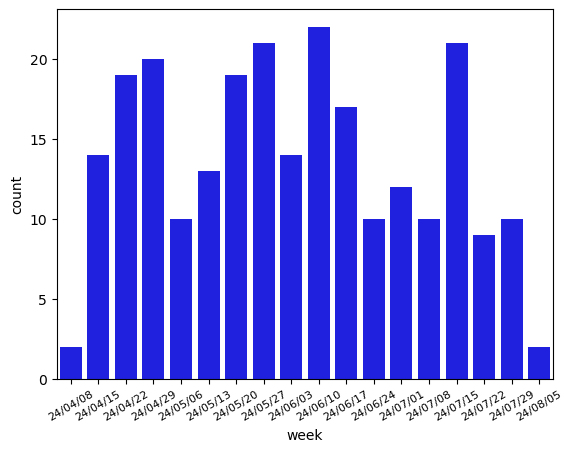

In [8]:
print(sorted(df_articles['week'].unique()))
    
print(df_articles['week'].value_counts())

sns.countplot(x = 'week', data = df_articles, order = sorted(df_articles['week'].unique()), color = 'blue')
plt.xticks(rotation=30,size=8)
plt.show()

In [15]:
df_articles.to_csv('CNN_08_08_245_arts')

In [3]:
df_articles = pd.read_csv('CNN_08_08_245_arts')

In [3]:
def collect_text(url):
    stringified_article = ''
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    paragraphs = soup.find_all('p', attrs = {'class': 'paragraph inline-placeholder vossi-paragraph-primary-core-light'})
    for par in paragraphs:
        stringified_article += par.text
    return stringified_article


In [2]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
from nltk.tokenize import sent_tokenize,word_tokenize

In [3]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

C:\Users\em17\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [4]:
def chunked_article(article):
    cleaned_article = article.replace('\xa0', ' ').replace('  ', '').replace('\n', ' ')
    double_tokenized = [word_tokenize(sent) for sent in sent_tokenize(cleaned_article)]
    
    limits = []
    running_count = 0
    for i in range(len(double_tokenized)):
        if len(double_tokenized[i])+running_count > 390:
            limits.append(i)
            running_count = len(double_tokenized[i])
        else:
            running_count += len(double_tokenized[i])
    limits.append('')
    chunks = []
    start = 0
    for l in limits:
        chunk = []
        try:
            for i in range(start,l):
                chunk = chunk+double_tokenized[i]
            start = l
            chunks.append(chunk)
        except:
            for i in range(start,len(double_tokenized)):
                chunk = chunk+double_tokenized[i]
            chunks.append(chunk)
    weights = []
    total = 0
    for chunk in chunks:
        weights.append(len(chunk))
        total += len(chunk)
    weights = [i/total for i in weights]
    return chunks,weights
            



In [8]:
scores_dict = {'pos': [], 'neu': [], 'neg': []}

i = 1

for link in df_articles.link:
    print(i)
    neg = []
    neu = []
    pos = []
    
    chunked, chunk_weights = chunked_article(collect_text(link))
    
    for chunk in chunked:
        
        encoded_text = tokenizer(' '.join(chunk), return_tensors='pt')
        output = model(**encoded_text)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        neg.append(scores[0])
        neu.append(scores[1])
        pos.append(scores[2])


    scores_dict['pos'].append(np.sum(np.array(pos)*np.array(chunk_weights)))
    scores_dict['neu'].append(np.sum(np.array(neu)*np.array(chunk_weights)))
    scores_dict['neg'].append(np.sum(np.array(neg)*np.array(chunk_weights)))

    i+=1
        
scores_dict

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245


{'pos': [0.1028249063879915,
  0.06553309130888713,
  0.06678487053483624,
  0.08196210052248232,
  0.27370360493659973,
  0.08354858033908684,
  0.1133444540917057,
  0.05405589747317089,
  0.032445287570125055,
  0.0951848431431375,
  0.02912968397140503,
  0.06434771383606945,
  0.2648640893997755,
  0.08547076874619167,
  0.028988655463238307,
  0.06583691978043703,
  0.07476797532230328,
  0.14713988207670858,
  0.15023082417145583,
  0.024209434473110986,
  0.10815183473605254,
  0.08716542282657212,
  0.3104014604137494,
  0.028735940835120155,
  0.0380413992791697,
  0.07879805808408333,
  0.03516005082028345,
  0.07164842099159219,
  0.03574004114187997,
  0.07440577635862919,
  0.026601648007084464,
  0.14253805374597212,
  0.17290967618860106,
  0.1431449629916977,
  0.17940364415703572,
  0.1535412073135376,
  0.2893340289592743,
  0.04707495906476766,
  0.05261110841453043,
  0.3704245062694672,
  0.02953408476645702,
  0.022089507142213027,
  0.023200741557969556,
  0.198

In [9]:
df_articles['pos'] = scores_dict['pos']
df_articles['neu'] = scores_dict['neu']
df_articles['neg'] = scores_dict['neg']

global_score = lambda x: x['pos']-x['neg']
norm_global_score = lambda x: 20*(0.5+(x/2))

df_articles['global'] = df_articles.apply(global_score,axis = 1)
df_articles['global'] = df_articles['global'].apply(norm_global_score)


df_articles

,Unnamed: 0,title,link,week,pos,neu,neg,global
0,0,Trump in 2020 praised Tim Walz’s handling of G...,https://www.cnn.com/2024/08/07/politics/trump-...,24/08/05,0.102825,0.532621,0.364554,7.382709
1,1,How the Trump campaign plans to try to define ...,https://www.cnn.com/2024/08/06/politics/republ...,24/08/05,0.065533,0.604329,0.330138,7.353955
2,2,Trump and Vance rally in battleground Georgia ...,https://www.cnn.com/2024/08/03/politics/trump-...,24/07/29,0.066785,0.571632,0.361583,7.052015
3,3,Trump says he’ll debate Harris on Fox News or ...,https://www.cnn.com/2024/08/03/politics/kamala...,24/07/29,0.081962,0.633192,0.284846,7.971160
4,4,Trump’s political operation says it raised nea...,https://www.cnn.com/2024/08/01/politics/donald...,24/07/29,0.273704,0.700379,0.025917,12.477863
...,...,...,...,...,...,...,...,...
240,240,New Trump super PAC ad hammers Biden on immigr...,https://www.cnn.com/2024/04/17/politics/trump-...,24/04/15,0.108911,0.492021,0.399069,7.098421
241,241,"Trump targets Alvin Bragg, the prosecutor in h...",https://www.cnn.com/2024/04/16/politics/trump-...,24/04/15,0.054358,0.485904,0.459737,5.946209
242,242,Did Donald Trump fall asleep in court? Why the...,https://www.cnn.com/2024/04/16/media/donald-tr...,24/04/15,0.058865,0.512288,0.428847,6.300185
243,243,Trump has an unusual request on trial Day 1,https://www.cnn.com/2024/04/15/politics/trump-...,24/04/15,0.041339,0.456062,0.502600,5.387390


In [10]:
df_articles.to_csv('CNN_08_08_245_arts')

In [13]:
df_articles_agg = df_articles.iloc[:,3:].groupby('week').mean()

df_articles_agg

,pos,neu,neg,global
week,,,,
24/04/08,0.201279,0.528369,0.270353,9.309260
24/04/15,0.064123,0.544079,0.391798,6.723253
24/04/22,0.084410,0.573079,0.342512,7.418980
24/04/29,0.103580,0.542258,0.354162,7.494187
24/05/06,0.107576,0.524465,0.367959,7.396164
24/05/13,0.089123,0.560542,0.350335,7.387878
24/05/20,0.111099,0.531914,0.356987,7.541119
24/05/27,0.087057,0.534448,0.378495,7.085612
24/06/03,0.131506,0.561202,0.307292,8.242149


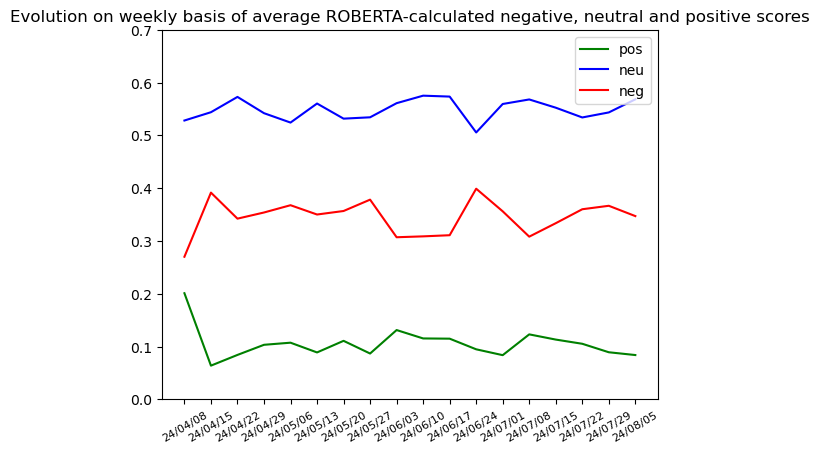

In [27]:
plt.plot(df_articles_agg.index, df_articles_agg['pos'], 'green')
plt.plot(df_articles_agg.index, df_articles_agg['neu'], 'blue')
plt.plot(df_articles_agg.index, df_articles_agg['neg'], 'red')
plt.legend(['pos', 'neu', 'neg'], loc = 'upper right')
plt.xticks(rotation=30,size=8)
plt.yticks(np.arange(0,0.8,step = 0.1))
plt.title('Evolution on weekly basis of average ROBERTA-calculated negative, neutral and positive scores')
plt.show()

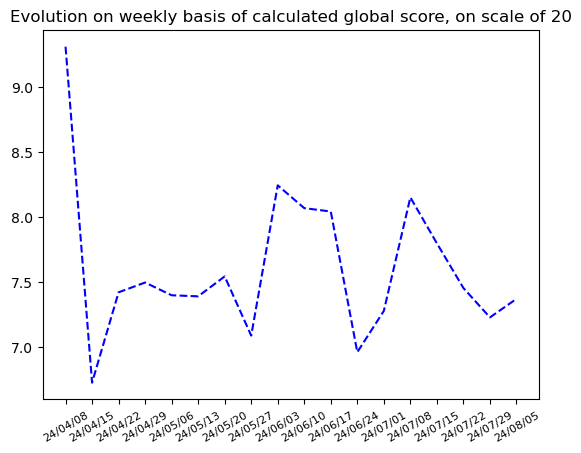

In [26]:
plt.plot(df_articles_agg.index, df_articles_agg['global'], 'blue', linestyle = '--')
plt.xticks(rotation=30,size=8)
plt.title('Evolution on weekly basis of calculated global score, on scale of 20')
plt.show()

In [24]:
df_articles = pd.read_csv('08_07_500_results')

df_articles.head()

,Unnamed: 0,title,link,date,year-week,pos,neu,neg
0,0,How the Trump campaign plans to try to define ...,https://www.cnn.com/2024/08/06/politics/republ...,2024-08-06 00:00:00,24/32,0.066851,0.601251,0.331898
1,1,Trump and Vance rally in battleground Georgia ...,https://www.cnn.com/2024/08/03/politics/trump-...,2024-08-03 00:00:00,24/31,0.066565,0.567361,0.366075
2,2,Trump says he’ll debate Harris on Fox News or ...,https://www.cnn.com/2024/08/03/politics/kamala...,2024-08-03 00:00:00,24/31,0.064322,0.638196,0.297481
3,3,Trump’s political operation says it raised nea...,https://www.cnn.com/2024/08/01/politics/donald...,2024-08-01 00:00:00,24/31,0.273704,0.700379,0.025917
4,4,Trump wants to stop taxing Social Security ben...,https://www.cnn.com/2024/08/01/politics/social...,2024-08-01 00:00:00,24/31,0.079101,0.518290,0.402609


In [ ]:
global_score = lambda x: x['pos']-x['neg']
norm_global_score = lambda x: 20*(0.5+(x/2))

df_articles['global'] = df_articles.apply(global_score,axis = 1)
df_articles['global'] = df_articles['global'].apply(norm_global_score)


df_articles

In [3]:
def date_nyp(stamp):
    dt_time = (stamp.split('  ')[1])
    date = dt_time.split('|')[0]
    date = datetime.strptime(date, '%B %d, %Y ')
    return date

In [4]:
driver = Edge('c:/users/em17/edgedriver_win64/msedgedriver.exe')

articles_nyp = {}
articles_nyp['title'] = []
articles_nyp['link'] = []
articles_nyp['week'] = []

subject = 'Trump'

nb_results = 5000
nb_pages = (nb_results//20)+1

for i in range(1, nb_pages+1):
    page = f'https://nypost.com/search/Trump/page/{i}/'
    print(page)
    driver.get(page)
    time.sleep(1)
    articles = driver.find_elements_by_class_name('search-results__story')
    for article in articles:
        try:
            encart = article.find_element_by_class_name('story__text')
            title = encart.find_element_by_tag_name("a").text
        except:
            title = 'title not found'
        try:
            link = article.find_element_by_tag_name("a").get_attribute('href')
        except:
            link = 'link not found'
        try:
            date = date_nyp(article.find_element_by_class_name('meta--byline').text)
        except:
            date = 'date not found'
        if title_proofing(title,subject)==False:
            continue
      
        
        delta = int(datetime.strftime(date,'%w'))-1
        week = date - timedelta(days = delta)

        articles_nyp['title'].append(title)
        articles_nyp['link'].append(link)
        articles_nyp['week'].append(datetime.strftime(week,'%y/%m/%d'))


driver.quit()


df_articles = pd.DataFrame(articles_nyp)

df_articles

https://nypost.com/search/Trump/page/1/
https://nypost.com/search/Trump/page/2/
https://nypost.com/search/Trump/page/3/
https://nypost.com/search/Trump/page/4/
https://nypost.com/search/Trump/page/5/
https://nypost.com/search/Trump/page/6/
https://nypost.com/search/Trump/page/7/
https://nypost.com/search/Trump/page/8/
https://nypost.com/search/Trump/page/9/
https://nypost.com/search/Trump/page/10/
https://nypost.com/search/Trump/page/11/
https://nypost.com/search/Trump/page/12/
https://nypost.com/search/Trump/page/13/
https://nypost.com/search/Trump/page/14/
https://nypost.com/search/Trump/page/15/
https://nypost.com/search/Trump/page/16/
https://nypost.com/search/Trump/page/17/
https://nypost.com/search/Trump/page/18/
https://nypost.com/search/Trump/page/19/
https://nypost.com/search/Trump/page/20/
https://nypost.com/search/Trump/page/21/
https://nypost.com/search/Trump/page/22/
https://nypost.com/search/Trump/page/23/
https://nypost.com/search/Trump/page/24/
https://nypost.com/search

https://nypost.com/search/Trump/page/199/
https://nypost.com/search/Trump/page/200/
https://nypost.com/search/Trump/page/201/
https://nypost.com/search/Trump/page/202/
https://nypost.com/search/Trump/page/203/
https://nypost.com/search/Trump/page/204/
https://nypost.com/search/Trump/page/205/
https://nypost.com/search/Trump/page/206/
https://nypost.com/search/Trump/page/207/
https://nypost.com/search/Trump/page/208/
https://nypost.com/search/Trump/page/209/
https://nypost.com/search/Trump/page/210/
https://nypost.com/search/Trump/page/211/
https://nypost.com/search/Trump/page/212/
https://nypost.com/search/Trump/page/213/
https://nypost.com/search/Trump/page/214/
https://nypost.com/search/Trump/page/215/
https://nypost.com/search/Trump/page/216/
https://nypost.com/search/Trump/page/217/
https://nypost.com/search/Trump/page/218/
https://nypost.com/search/Trump/page/219/
https://nypost.com/search/Trump/page/220/
https://nypost.com/search/Trump/page/221/
https://nypost.com/search/Trump/pa

,title,link,week
0,"Trump would improve education for all kids, wh...",https://nypost.com/2024/08/15/opinion/trump-wo...,24/08/12
1,Trump blasts Kamala Harris' high grocery price...,https://nypost.com/2024/08/15/us-news/trump-bl...,24/08/12
2,"Donald Trump, not Kamala Harris, is the candid...",https://nypost.com/2024/08/15/us-news/donald-t...,24/08/12
3,Trump says he's 'entitled to personal attacks'...,https://nypost.com/2024/08/15/us-news/trump-sa...,24/08/12
4,"Trump beefs up operation with campaign alum, o...",https://nypost.com/2024/08/15/us-news/trump-be...,24/08/12
...,...,...,...
886,Trump's assets -- including some of his prized...,https://nypost.com/2024/02/20/us-news/ag-james...,24/02/19
887,Trump accuses Biden of personally getting 'a l...,https://nypost.com/2024/02/20/us-news/trump-sa...,24/02/19
888,The NYC skyscraper Trump could dump to pay off...,https://nypost.com/2024/02/20/us-news/the-nyc-...,24/02/19
889,Trump will dispute NYC judge’s definition of ‘...,https://nypost.com/2024/02/19/us-news/trump-wi...,24/02/19


In [5]:
df_articles.to_csv('NYP_08_15_891_arts')

In [11]:
df_articles_nyp = pd.read_csv('NYP_08_15_891_arts')
len(df_articles_nyp)

891

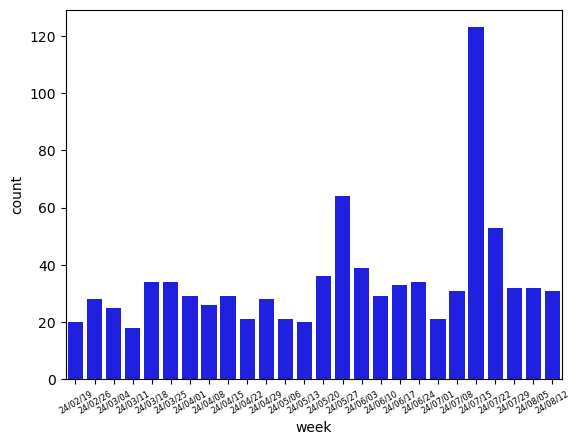

In [9]:
sns.countplot(data = df_articles_nyp, x = 'week',order = sorted(df_articles_nyp['week'].unique()), color = 'blue')
plt.xticks(rotation=30,size=6)
plt.show()

In [5]:
def collect_text_nyp(url):
    stringified_article = ''
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    paragraphs = soup.find_all('p')
    for par in paragraphs:
        stringified_article += ' '+par.text
    return stringified_article

In [6]:
def chunked_article_nyp(article):
    cleaned_article = article.replace('\xa0', ' ').replace('  ', '').replace('\n', ' ').replace('\xad', ' ')
    double_tokenized = [word_tokenize(sent) for sent in sent_tokenize(cleaned_article)]
    
    limits = []
    running_count = 0
    for i in range(len(double_tokenized)):
        if len(double_tokenized[i])+running_count > 300:
            limits.append(i)
            running_count = len(double_tokenized[i])
        else:
            running_count += len(double_tokenized[i])
    limits.append('')
    chunks = []
    start = 0
    for l in limits:
        chunk = []
        try:
            for i in range(start,l):
                chunk = chunk+double_tokenized[i]
            start = l
            chunks.append(chunk)
        except:
            for i in range(start,len(double_tokenized)):
                chunk = chunk+double_tokenized[i]
            chunks.append(chunk)
    weights = []
    total = 0
    for chunk in chunks:
        weights.append(len(chunk))
        total += len(chunk)
    weights = [i/total for i in weights]
    return chunks,weights

In [16]:
for art in df_articles_nyp.link[:5]:
    print(chunked_article_nyp(collect_text_nyp(art)))

([['The', 'difference', 'between', 'Donald', 'Trump', 'and', 'Kamala', 'Harris', 'in', 'November', 'could', 'not', 'be', 'clearer', 'when', 'it', 'comes', 'to', 'education', '.', 'Trump', 'believes', 'parents', 'are', 'the', 'primary', 'decision-makers', 'for', 'their', 'children', 'and', 'supports', 'the', 'money', 'following', 'the', 'child', 'to', 'the', 'school', 'that', 'best', 'meets', 'their', 'needs', 'and', 'aligns', 'with', 'their', 'family', '’', 's', 'values', '.', 'In', 'a', 'May', 'Truth', 'Social', 'post', ',', 'President', 'Trump', 'said', ',', '“', 'School', 'Choice', 'is', 'the', 'CIVIL', 'RIGHTS', 'ISSUE', 'of', 'our', 'time', ',', 'and', 'parents', 'must', 'have', 'a', 'voice', 'in', 'their', 'child', '’', 's', 'education', '!', 'When', 'I', 'am', 'your', 'President', 'again', ',', 'I', 'will', 'protect', 'Parental', 'Rights', ',', 'support', 'Teachers', ',', 'and', 'expand', 'Educational', 'Freedom', 'for', 'all', 'American', 'Families', '!', '”', 'At', 'a', 'June'

([['Former', 'President', 'Donald', 'Trump', 'talked', 'at', 'length', 'about', 'the', 'state', 'of', 'the', 'economy', 'on', 'Thursday', ',', 'slamming', 'Vice', 'President', 'Kamala', 'Harris', '’', 'soon-to-be-revealed', 'economic', 'agenda', 'as', 'a', 'socialist', 'plan', 'that', 'will', 'continue', 'Biden-Harris', 'policies', 'that', 'have', 'ravaged', 'the', 'cost', 'of', 'living', '.', '“', 'We', 'call', 'it', 'the', '‘', 'Maduro', 'plan', ',', '’', 'like', 'something', 'straight', 'out', 'of', 'Venezuela', 'or', 'the', 'Soviet', 'Union', ',', '”', 'he', 'said', ',', 'referencing', 'socialist', 'Venezuelan', 'president', 'Nicolas', 'Maduro', '.', '“', '[', 'Harris', '’', 'new', 'economic', 'plan', ']', 'is', 'an', 'admission', 'that', 'her', 'economic', 'policies', 'have', 'totally', 'failed', 'and', 'caused', 'really', 'a', 'catastrophe', 'for', 'our', 'country', ',', 'and', 'beyond', 'that', ',', 'a', 'catastrophe', 'in', 'the', 'world.', '”', 'Harris', 'is', 'expected', 'to'

([['Former', 'President', 'Donald', 'Trump', 'said', 'Thursday', 'that', '“', 'I', '’', 'm', 'entitled', 'to', 'personal', 'attacks', '”', 'against', 'Vice', 'President', 'Kamala', 'Harris', '—', 'noting', 'the', 'fact', 'that', 'Democrats', '“', 'want', 'to', 'put', 'me', 'in', 'prison.', '”', '“', 'I', 'think', 'I', '’', 'm', 'entitled', 'to', 'personal', 'attacks', '.', 'I', 'don', '’', 't', 'have', 'a', 'lot', 'of', 'respect', 'for', 'her', ',', '”', 'Trump', 'said', 'during', 'a', 'press', 'conference', 'at', 'his', 'golf', 'club', 'in', 'Bedminster', ',', 'NJ', '—', 'rejecting', 'criticism', ',', 'including', 'from', 'former', 'Gov', '.', 'Nikki', 'Haley', '(', 'R-SC', ')', ',', 'that', 'he', 'should', 'stick', 'to', 'the', 'issues', '.', '“', 'They', 'don', '’', 't', 'want', 'me', 'to', 'be', 'a', 'little', 'bit', 'nasty', '?', 'They', 'want', 'to', 'put', 'me', 'in', 'prison', '.', 'Me', '!', 'They', 'want', 'to', 'put', '—', 'never', 'happened', 'before', 'in', 'the', 'history

([['Gettin', '’', 'the', 'old', 'band', 'back', 'together', '.', 'Former', 'President', 'Donald', 'Trump', '’', 's', 'campaign', 'is', 'bolstering', 'its', 'operations', 'with', 'a', 'slew', 'of', 'veterans', 'from', 'his', 'past', 'presidential', 'cycles', ',', 'including', 'his', '2016', 'campaign', 'manager', 'Corey', 'Lewandowski', 'joining', 'its', 'ranks.', '“', 'As', 'we', 'head', 'into', 'the', 'home', 'stretch', 'of', 'this', 'election', ',', 'we', 'are', 'continuing', 'to', 'add', 'to', 'our', 'impressive', 'campaign', 'team', ',', '”', 'campaign', 'senior', 'aides', 'Susie', 'Wiles', 'and', 'Chris', 'LaCivita', ',', 'who', 'are', 'effectively', 'co-managing', 'his', 'campaign', ',', 'said', 'in', 'a', 'statement.', '“', 'Corey', 'Lewandowski', ',', 'Taylor', 'Budowich', ',', 'Alex', 'Pfeiffer', ',', 'Alex', 'Bruesewitz', ',', 'and', 'Tim', 'Murtaugh', 'are', 'all', 'veterans', 'of', 'prior', 'Trump', 'campaigns', 'and', 'their', 'unmatched', 'experience', 'will', 'help', 'Pr

In [8]:
nyp_scores_dict = {'pos': [], 'neu': [], 'neg': []}

i = 1

for link in df_articles_nyp.link[:677]:
    print(i)
    neg = []
    neu = []
    pos = []
    
    chunked, chunk_weights = chunked_article_nyp(collect_text_nyp(link))
    
    try:
    
        for chunk in chunked:
    
            encoded_text = tokenizer(' '.join(chunk), return_tensors='pt')
            output = model(**encoded_text)
            scores = output[0][0].detach().numpy()
            scores = softmax(scores)
            neg.append(scores[0])
            neu.append(scores[1])
            pos.append(scores[2])


        nyp_scores_dict['pos'].append(np.sum(np.array(pos)*np.array(chunk_weights)))
        nyp_scores_dict['neu'].append(np.sum(np.array(neu)*np.array(chunk_weights)))
        nyp_scores_dict['neg'].append(np.sum(np.array(neg)*np.array(chunk_weights)))
    
    except:
        if i % 50 == 0:
            df_nyp_results = pd.DataFrame(nyp_scores_dict)
            df_nyp_results.to_csv('nyp_results')
        i+=1
        continue

    if i % 50 == 0:
        df_nyp_results = pd.DataFrame(nyp_scores_dict)
        df_nyp_results.to_csv('nyp_results')
    i+=1
        
nyp_scores_dict

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


{'pos': [0.19019937709913598,
  0.09327705553788646,
  0.24670495839919,
  0.031306471000319205,
  0.22818205846485748,
  0.24324909018493504,
  0.04412729665637016,
  0.14727541072560207,
  0.026134840675566824,
  0.30265300884936586,
  0.6017585996392969,
  0.11170645424283247,
  0.28532660534748666,
  0.08563909407220059,
  0.24461371141175428,
  0.014717670157551765,
  0.23593541979789734,
  0.1412531034339492,
  0.06525648840386228,
  0.03726995743000535,
  0.3160263392570857,
  0.03471150336060989,
  0.08267512928850297,
  0.07662490755319595,
  0.03363376326466862,
  0.18492340538650753,
  0.15627601459002283,
  0.1383781331653621,
  0.026830448975560556,
  0.1753467583577581,
  0.017948934767585602,
  0.5349075207731119,
  0.22578345239162445,
  0.10975000279243377,
  0.19021118075369361,
  0.7987207277433865,
  0.09429150238158364,
  0.023487138973092132,
  0.17452803595360056,
  0.029595806922730616,
  0.1553018452576133,
  0.0365676713131723,
  0.18926992694295083,
  0.27783

In [9]:
df_nyp_results = pd.DataFrame(nyp_scores_dict)
df_nyp_results.to_csv('nyp_results')

In [7]:
idx = 0

for link in df_articles_nyp.link[:677]:
    
    print(idx)
    
    chunked, chunk_weights = chunked_article_nyp(collect_text_nyp(link))
    
    for chunk in chunked:
        try:
            encoded_text = tokenizer(' '.join(chunk), return_tensors='pt')
            output = model(**encoded_text)
        except:
            print(f'ERROR AT INDEX {idx}')
    idx+=1

0
1
2
3
4
5
6
7
8
9
ERROR AT INDEX 9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
2

In [9]:
for i in [9,353,658]:
    print(i)
    neg = []
    neu = []
    pos = []
    
    chunked, chunk_weights = chunked_article_nyp(collect_text_nyp(df_articles_nyp.link[i]))
    
    
    
    for chunk in chunked:
        
        try:
            encoded_text = tokenizer(' '.join(chunk), return_tensors='pt')
            output = model(**encoded_text)
            scores = output[0][0].detach().numpy()
            scores = softmax(scores)
            print(scores[0],scores[1],scores[2])
        except: 
            print('error')


9
0.5674696 0.37075862 0.0617718
0.39829886 0.45947045 0.14223072
0.6622088 0.30040327 0.03738794
error
0.022157447 0.19624513 0.7815974
353
0.42830342 0.50472134 0.066975236
error
658
0.0060505425 0.11829219 0.8756572
error
0.016540756 0.7588693 0.22458996


In [10]:
df_nyp_results = pd.read_csv('nyp_results')
len(df_nyp_results)

674

In [22]:
df_nyp_results = pd.read_csv('nyp_results')


df_nyp_results = df_nyp_results[['pos','neu','neg']]




In [23]:
df_nyp_results

,pos,neu,neg
0,0.190199,0.406008,0.403793
1,0.093277,0.376208,0.530515
2,0.246705,0.599101,0.154194
3,0.031306,0.366495,0.602198
4,0.228182,0.624696,0.147122
...,...,...,...
669,0.068864,0.497420,0.433716
670,0.135560,0.481329,0.383111
671,0.057923,0.552235,0.389842
672,0.128174,0.487252,0.384574


In [27]:
nyp_arts_df = pd.read_csv('NYP_08_15_891_arts')
nyp_arts_df = nyp_arts_df.loc[:676]


nyp_arts_df = nyp_arts_df[['title', 'link', 'week']].drop([9,353,658]).reset_index(drop = True)

nyp_arts_df

,title,link,week
0,"Trump would improve education for all kids, wh...",https://nypost.com/2024/08/15/opinion/trump-wo...,24/08/12
1,Trump blasts Kamala Harris' high grocery price...,https://nypost.com/2024/08/15/us-news/trump-bl...,24/08/12
2,"Donald Trump, not Kamala Harris, is the candid...",https://nypost.com/2024/08/15/us-news/donald-t...,24/08/12
3,Trump says he's 'entitled to personal attacks'...,https://nypost.com/2024/08/15/us-news/trump-sa...,24/08/12
4,"Trump beefs up operation with campaign alum, o...",https://nypost.com/2024/08/15/us-news/trump-be...,24/08/12
...,...,...,...
669,Trump fumes that judge in hush money trial cou...,https://nypost.com/2024/04/15/us-news/trump-fu...,24/04/15
670,Trump is right on abortion — pro-lifers should...,https://nypost.com/2024/04/15/opinion/trump-is...,24/04/15
671,Trump Media shares tank as ex-prez's stake in ...,https://nypost.com/2024/04/15/business/trump-m...,24/04/15
672,Trump supporters label RFK Jr. 'Radical F—ing ...,https://nypost.com/2024/04/15/us-news/trump-su...,24/04/15


In [30]:
nyp_final_df = pd.merge(nyp_arts_df, df_nyp_results, left_index = True, right_index = True)


nyp_final_df.to_csv('NYP_08_17_final')

nyp_final_df

,title,link,week,pos,neu,neg
0,"Trump would improve education for all kids, wh...",https://nypost.com/2024/08/15/opinion/trump-wo...,24/08/12,0.190199,0.406008,0.403793
1,Trump blasts Kamala Harris' high grocery price...,https://nypost.com/2024/08/15/us-news/trump-bl...,24/08/12,0.093277,0.376208,0.530515
2,"Donald Trump, not Kamala Harris, is the candid...",https://nypost.com/2024/08/15/us-news/donald-t...,24/08/12,0.246705,0.599101,0.154194
3,Trump says he's 'entitled to personal attacks'...,https://nypost.com/2024/08/15/us-news/trump-sa...,24/08/12,0.031306,0.366495,0.602198
4,"Trump beefs up operation with campaign alum, o...",https://nypost.com/2024/08/15/us-news/trump-be...,24/08/12,0.228182,0.624696,0.147122
...,...,...,...,...,...,...
669,Trump fumes that judge in hush money trial cou...,https://nypost.com/2024/04/15/us-news/trump-fu...,24/04/15,0.068864,0.497420,0.433716
670,Trump is right on abortion — pro-lifers should...,https://nypost.com/2024/04/15/opinion/trump-is...,24/04/15,0.135560,0.481329,0.383111
671,Trump Media shares tank as ex-prez's stake in ...,https://nypost.com/2024/04/15/business/trump-m...,24/04/15,0.057923,0.552235,0.389842
672,Trump supporters label RFK Jr. 'Radical F—ing ...,https://nypost.com/2024/04/15/us-news/trump-su...,24/04/15,0.128174,0.487252,0.384574


In [39]:
url = 'https://nypost.com/2024/04/15/opinion/trump-is-right-on-abortion-pro-lifers-should-realize-hes-their-lifeline/'

neg = []
neu = []
pos = []
    
chunked, chunk_weights = chunked_article_nyp(collect_text_nyp(url))
    
    
for chunk in chunked:
    
        encoded_text = tokenizer(' '.join(chunk), return_tensors='pt')
        output = model(**encoded_text)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        neg.append(scores[0])
        neu.append(scores[1])
        pos.append(scores[2])


print(np.sum(np.array(pos)*np.array(chunk_weights)))
print(np.sum(np.array(neu)*np.array(chunk_weights)))
print(np.sum(np.array(neg)*np.array(chunk_weights)))

0.13556017767020448
0.4813286552966481
0.383111162762988


In [41]:
nyp_final_df_agg = nyp_final_df.iloc[:,2:].groupby('week').mean()

nyp_final_df_agg

,pos,neu,neg
week,,,
24/04/15,0.093653,0.466392,0.439955
24/04/22,0.098635,0.520480,0.380885
24/04/29,0.152265,0.475237,0.372498
24/05/06,0.182735,0.484562,0.332703
24/05/13,0.150370,0.521051,0.328579
24/05/20,0.158836,0.508929,0.332235
24/05/27,0.112665,0.486093,0.401243
24/06/03,0.120511,0.531350,0.348139
24/06/10,0.171638,0.549639,0.278723


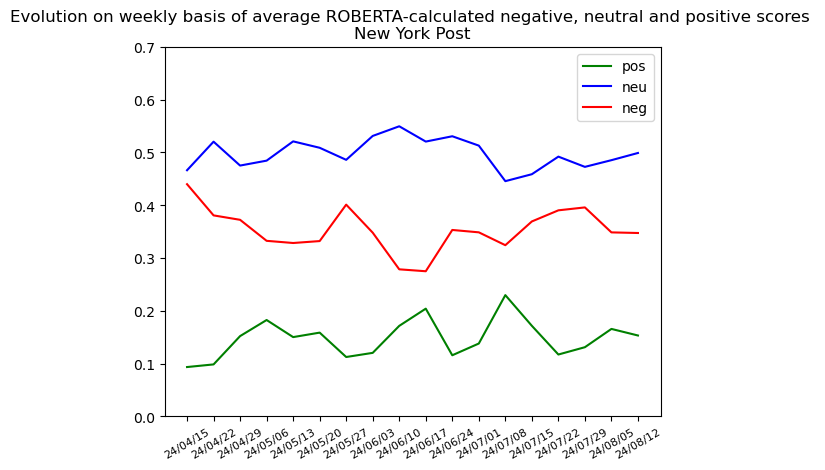

In [43]:
plt.plot(nyp_final_df_agg.index, nyp_final_df_agg['pos'], 'green')
plt.plot(nyp_final_df_agg.index, nyp_final_df_agg['neu'], 'blue')
plt.plot(nyp_final_df_agg.index, nyp_final_df_agg['neg'], 'red')
plt.legend(['pos', 'neu', 'neg'], loc = 'upper right')
plt.xticks(rotation=30,size=8)
plt.yticks(np.arange(0,0.8,step = 0.1))
plt.title('Evolution on weekly basis of average ROBERTA-calculated negative, neutral and positive scores \nNew York Post')
plt.show()